## Постановка задачі
Набір даних про дитячі імена США з веб-сайту
kaggle.com (https://www.kaggle.com/kaggle/us-babynames?select=NationalNames.csv)

Номери вправ
1, 2, 3, 5, 10-18, 21-24, 26

In [1]:
import kagglehub

path = kagglehub.dataset_download("kaggle/us-baby-names")

print("Path to dataset files:", path)

100%|██████████| 173M/173M [00:01<00:00, 139MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/kaggle/us-baby-names/versions/2


1. Вивести перші 8 рядків
2. Вивести останні 8 рядків
3. Отримайте імена стовпців набору даних
5. Знайдіть кількість унікальних імен у наборі даних
10. Підрахуйте кількість унікальних імен у кожному році
11. Знайдіть рік із найбільшою кількістю унікальних імен.
12. Знайдіть найпопулярніше ім’я в році з найбільшою кількістю
унікальних імен (тобто у 2008 році)
13. Знайдіть рік, коли ім’я “Jacob” було найпопулярнішим серед
жіночих імен
14. Знайти рік із найбільшою кількістю гендерно нейтральних імен
(однакові чоловічі та жіночі імена)
15. Знайдіть загальну кількість народжень за рік.
16. Знайдіть рік, коли народилося найбільше дітей
17. Знайдіть кількість дівчаток та хлопчиків, які народились кожного
року
18. Підрахуйте кількість років, коли дівчаток народжувалось більше,
ніж хлопчиків.
21. Порахуйте, скільки разів хлопчиків називали Barbara
22. Підрахуйте скільки років проводилось спостереження
23. Знати найпопулярніші гендерно-нейтральні імена (ті, що присутні
кожного року)
24. Знайти найпопулярніше серед непопулярних імен (непопулярне
ім’я, яким називали дітей найбільшу кількість разів )
26. Побудувати графіки розподілення кількості жіночих імен John та
чоловічих імен Mary по роках.

In [5]:
import pandas as pd
import os
csv_path = os.path.join(path, "NationalNames.csv")

df = pd.read_csv(csv_path)

# 1 вправа, вивести перші 8 рядків
print(df.head(8))

   Id       Name  Year Gender  Count
0   1       Mary  1880      F   7065
1   2       Anna  1880      F   2604
2   3       Emma  1880      F   2003
3   4  Elizabeth  1880      F   1939
4   5     Minnie  1880      F   1746
5   6   Margaret  1880      F   1578
6   7        Ida  1880      F   1472
7   8      Alice  1880      F   1414


In [6]:
# 2 вправа, вивести останні 8 рядків
print(df.tail(8))

              Id     Name  Year Gender  Count
1825425  1825426       Zo  2014      M      5
1825426  1825427    Zyeir  2014      M      5
1825427  1825428     Zyel  2014      M      5
1825428  1825429   Zykeem  2014      M      5
1825429  1825430   Zymeer  2014      M      5
1825430  1825431  Zymiere  2014      M      5
1825431  1825432    Zyran  2014      M      5
1825432  1825433    Zyrin  2014      M      5


In [9]:
# 3. Отримайте імена стовпців набору даних

print(df.columns.tolist())

['Id', 'Name', 'Year', 'Gender', 'Count']


In [10]:
# 5. Кількість унікальних імен у наборі

print("Унікальних імен:", df["Name"].nunique())

Унікальних імен: 93889


In [11]:
# 10. Кількість унікальних імен у кожному році

unique_names_per_year = df.groupby("Year")["Name"].nunique()
print(unique_names_per_year)

Year
1880     1889
1881     1830
1882     2012
1883     1962
1884     2158
        ...  
2010    31603
2011    31418
2012    31236
2013    30774
2014    30579
Name: Name, Length: 135, dtype: int64


In [14]:
# 11. Рік із найбільшою кількістю унікальних імен

max_year = unique_names_per_year.idxmax()
print("Рік з найбільшою кількістю унікальних імен:", max_year)

Рік з найбільшою кількістю унікальних імен: 2008


In [13]:
# 12. Найпопулярніше ім’я в році з найбільшою кількістю унікальних імен (2008)

top_name_2008 = df[df["Year"] == 2008].groupby("Name")["Count"].sum().idxmax()
print("Найпопулярніше ім’я у 2008:", top_name_2008)

Найпопулярніше ім’я у 2008: Jacob


In [15]:
#13. Рік, коли ім’я “Jacob” було найпопулярнішим серед дівчат

jacob_female = df[(df["Name"] == "Jacob") & (df["Gender"] == "F")]
year_jacob_female = jacob_female.loc[jacob_female["Count"].idxmax(), "Year"]
print("Рік найпопулярнішого 'Jacob' серед дівчат:", year_jacob_female)

Рік найпопулярнішого 'Jacob' серед дівчат: 2004


In [16]:
# 14. Рік із найбільшою кількістю гендерно нейтральних імен

neutral_names_by_year = df.groupby(["Year", "Name"])["Gender"].nunique().reset_index()
neutral_names = neutral_names_by_year[neutral_names_by_year["Gender"] == 2]
neutral_per_year = neutral_names.groupby("Year").size()
print("Рік з найбільшою кількістю гендерно нейтральних імен:", neutral_per_year.idxmax())

Рік з найбільшою кількістю гендерно нейтральних імен: 2008


In [17]:
# 15. Загальна кількість народжень за рік

births_per_year = df.groupby("Year")["Count"].sum()
print(births_per_year)

Year
1880     201484
1881     192699
1882     221538
1883     216950
1884     243467
         ...   
2010    3686589
2011    3646730
2012    3643336
2013    3626802
2014    3670151
Name: Count, Length: 135, dtype: int64


In [18]:
# 16. Рік, коли народилося найбільше дітей

print("Найбільше народжень у році:", births_per_year.idxmax())

Найбільше народжень у році: 1957


In [19]:
# 17. Кількість дівчаток та хлопчиків, які народились кожного року

births_by_gender_year = df.groupby(["Year", "Gender"])["Count"].sum().unstack()
print(births_by_gender_year)

Gender        F        M
Year                    
1880      90993   110491
1881      91954   100745
1882     107850   113688
1883     112321   104629
1884     129022   114445
...         ...      ...
2010    1772738  1913851
2011    1753500  1893230
2012    1753922  1889414
2013    1745339  1881463
2014    1768775  1901376

[135 rows x 2 columns]


In [20]:
# 18. Кількість років, коли дівчаток народжувалось більше, ніж хлопчиків

more_girls_years = (births_by_gender_year["F"] > births_by_gender_year["M"]).sum()
print("Років, коли дівчаток більше:", more_girls_years)

Років, коли дівчаток більше: 54


In [21]:
# 21. Скільки разів хлопчиків називали Barbara

barbara_male = df[(df["Name"] == "Barbara") & (df["Gender"] == "M")]["Count"].sum()
print("Хлопчиків з ім’ям Barbara:", barbara_male)

Хлопчиків з ім’ям Barbara: 4139


In [22]:
# 22. Кількість років, у які проводилось спостереження

print("Кількість років:", df["Year"].nunique())

Кількість років: 135


In [26]:
# 23. Найпопулярніші гендерно-нейтральні імена (які були кожного року)

# Список всіх років у датасеті
all_years = df["Year"].unique()
n_years = len(all_years)

# Кількість унікальних років, в яких кожне ім'я з'являється для кожного гендера
name_gender_years = df.groupby(["Name", "Gender"])["Year"].nunique().reset_index()

# Вибираємо лише ті імена, які з'являлись кожного року (для кожного гендера окремо)
names_all_years = name_gender_years[name_gender_years["Year"] == n_years]

# Тепер шукаємо ті імена, які були кожного року як у чоловіків, так і у жінок
neutral_names = names_all_years.groupby("Name")["Gender"].nunique()
neutral_names = neutral_names[neutral_names == 2].index.tolist()

# Фільтруємо основний датафрейм по цих іменах
neutral_df = df[df["Name"].isin(neutral_names)]

# Порахуємо суму народжень по кожному імені
popular_neutral_names = neutral_df.groupby("Name")["Count"].sum().sort_values(ascending=False)

print("Топ гендерно-нейтральних імен, які були кожного року:")
print(popular_neutral_names.head(15))


Топ гендерно-нейтральних імен, які були кожного року:
Name
James      5129096
John       5106590
Robert     4816785
William    4071368
Joseph     2580687
Jean        480901
Jesse       421406
Leslie      376587
Francis     312147
Lee         291691
Jessie      274931
Marion      259549
Johnnie     149953
Sidney      105185
Ollie        56482
Name: Count, dtype: int64


In [27]:
# 24. Найпопулярніше серед непопулярних імен

# Порахуємо скільки разів кожне ім’я зустрічається у датасеті
name_counts = df["Name"].value_counts()

# Вибираємо імена, які з’явились лише один раз
rare_names = name_counts[name_counts == 1].index

# Фільтруємо ці імена у датафреймі
rare_names_df = df[df["Name"].isin(rare_names)]

# Знаходимо ім’я серед них з найбільшою кількістю народжень
most_popular_rare = rare_names_df.loc[rare_names_df["Count"].idxmax()]

# Виводимо результат
print("Найпопулярніше серед непопулярних імен:")
print(f"Name: {most_popular_rare['Name']}, Gender: {most_popular_rare['Gender']}, Year: {most_popular_rare['Year']}, Count: {most_popular_rare['Count']}")


Найпопулярніше серед непопулярних імен:
Name: Christop, Gender: M, Year: 1989, Count: 1082


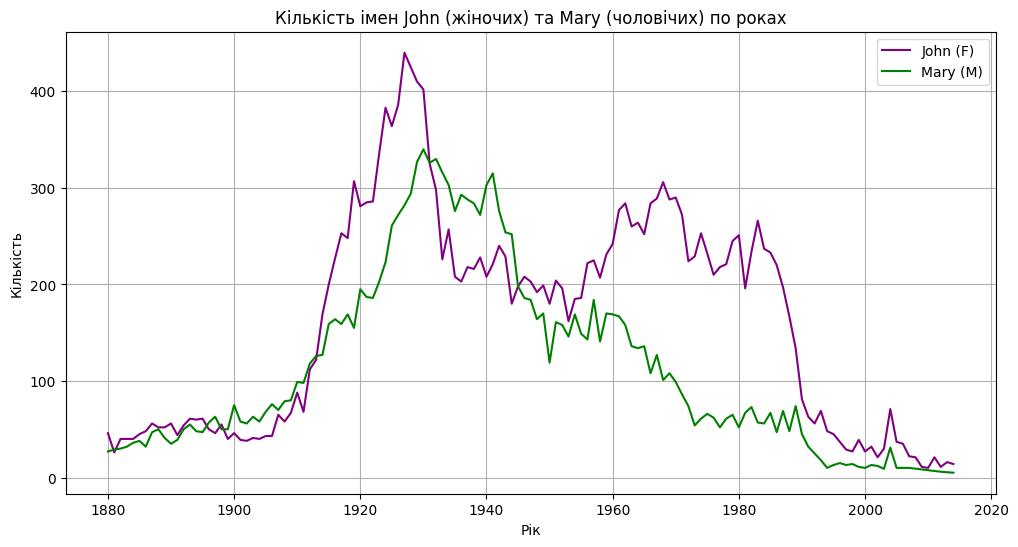

In [31]:
# 26. Графіки розподілення кількості жіночих імен John та чоловічих імен Mary по роках
import matplotlib.pyplot as plt

john_f = df[(df["Name"] == "John") & (df["Gender"] == "F")].groupby("Year")["Count"].sum()
mary_m = df[(df["Name"] == "Mary") & (df["Gender"] == "M")].groupby("Year")["Count"].sum()

plt.figure(figsize=(12, 6))
plt.plot(john_f, label="John (F)", color='purple')
plt.plot(mary_m, label="Mary (M)", color='green')
plt.legend()
plt.title("Кількість імен John (жіночих) та Mary (чоловічих) по роках")
plt.xlabel("Рік")
plt.ylabel("Кількість")
plt.grid(True)
plt.show()